# ForSys Title
### Generate an inference in a set of SurfaceEvolver steps

In [1]:
import sys
sys.path.append('..')
import forsys as fs
import os
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = os.path.join("data", "in_silico")
RESULTS_FOLDER = os.path.join("results")

max_time = 25

# This is only necessary if you wish to create outputs
# if not os.path.exists(RESULTS_FOLDER):
#     os.makedirs(RESULTS_FOLDER)

#### Create all the frames by iterating in time.
The real_time is used to get the $\Delta t$ in the velocity calculation

In [3]:
frames = {}
for time in range(max_time):
    if time == 0:
        real_time = 0
    elif time == 1:
        real_time += 1 * 25000 * 0.005
    else:
        real_time += 1 * 50 * 0.005

    lattice = fs.surface_evolver.SurfaceEvolver(os.path.join(DATA_FOLDER,
                                                             f"step_{time}.dmp"))
    vertices, edges, cells = lattice.create_lattice()
    frames[time] = fs.frames.Frame(time,
                                   vertices,
                                   edges,
                                   cells,
                                   time=real_time,
                                   gt=True)

##### Now create the ForSys object from all the frames. The mesh is created by automatically tracking the vertices through time

In [4]:
forsys = fs.ForSys(frames)

#### Build and solve the system of equations for the force and pressure
You could solve only the time of interest or all the times with a loop. The b_matrix parameter turns the Dynamic instance on

In [5]:
for time in range(max_time):
    forsys.build_force_matrix(when=time)
    forsys.solve_stress(when=time, allow_negatives=False, b_matrix="velocity")
    forsys.build_pressure_matrix(when=time)
    forsys.solve_pressure(when=time, method="lagrange_pressure")

Numerically solving due to negative values
Numerically solving due to negative values


#### Create system's plots

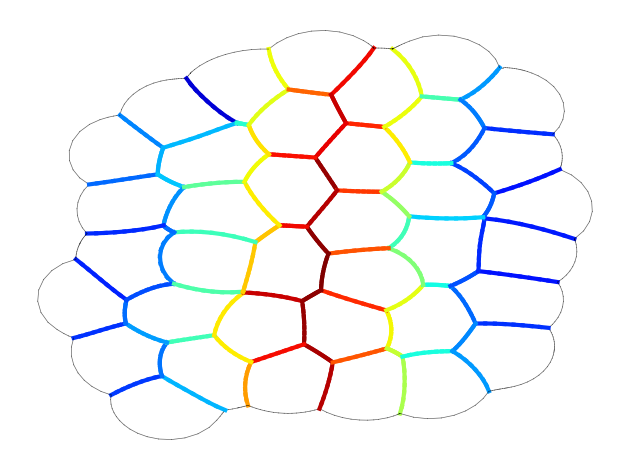

In [6]:
time_of_interest = 24

fig, ax = fs.plot.plot_inference(forsys.frames[time_of_interest],
                                 normalized="max",
                                 mirror_y=False,
                                 colorbar=False,
                                 pressure=False)

##### The pressure can be plotted using the pressure argument

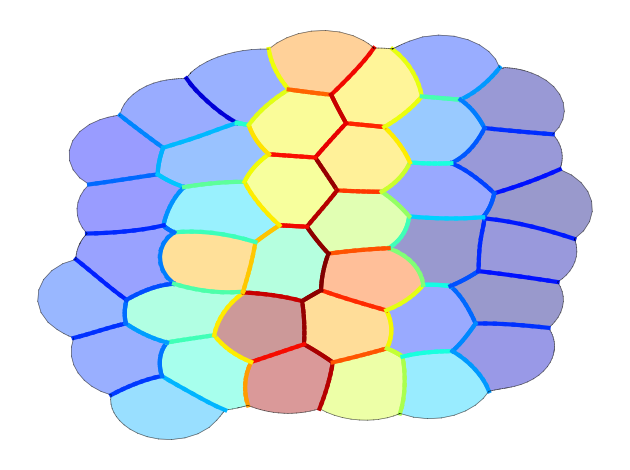

In [7]:
fig, ax = fs.plot.plot_inference(forsys.frames[time_of_interest],
                                 normalized="max",
                                 mirror_y=False,
                                 colorbar=False,
                                 pressure=True)